In [12]:
!pip install nltk

    100% |████████████████████████████████| 1.4MB 578kB/s 
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built nltk


In [1]:
import numpy as np
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/opt/conda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
df = pd.read_csv('../data400_share/beer.csv')

In [3]:
df.drop('index', axis = 1, inplace = True)
df.drop('review/timeStruct', axis = 1, inplace = True)
df.drop('user/birthdayRaw', axis = 1, inplace = True)

In [4]:
appearance = df['review/appearance']
aroma = df['review/aroma']
overall = df['review/overall']
palate = df['review/palate']
taste = df['review/taste']

In [5]:
df.drop('review/appearance', axis = 1, inplace = True)
df.drop('review/aroma', axis = 1, inplace = True)
df.drop('review/overall', axis = 1, inplace = True)
df.drop('review/palate', axis = 1, inplace = True)
df.drop('review/taste', axis = 1, inplace = True)

In [6]:
import matplotlib.pyplot as plt

(array([1.2091e+04, 2.3729e+04, 1.6750e+03, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.1 ,  5.86, 11.62, 17.38, 23.14, 28.9 , 34.66, 40.42, 46.18,
        51.94, 57.7 ]),
 <a list of 10 Patch objects>)

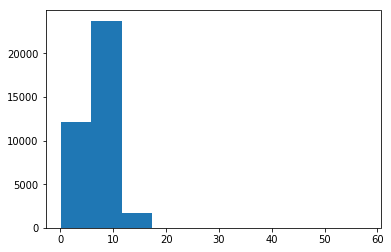

In [7]:
plt.hist(df['beer/ABV'])

In [8]:
df['user/gender'].fillna('Unknown', inplace = True)

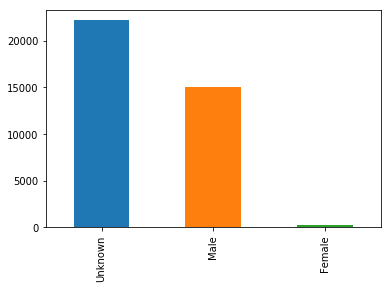

In [9]:
df['user/gender'].value_counts().plot(kind='bar')

In [10]:
df['user/gender'].value_counts()

Unknown    22186
Male       15069
Female       245
Name: user/gender, dtype: int64

In [11]:
genderDummy = pd.get_dummies(df['user/gender'])
df.drop('user/gender', axis = 1, inplace = True)

In [12]:
brewerDummy = pd.get_dummies(df['beer/brewerId'], prefix = "Brewer")
df.drop('beer/brewerId', axis = 1, inplace = True)

In [13]:
beerIdDummy =  pd.get_dummies(df['beer/beerId'], prefix = "BeerId")
df.drop('beer/beerId', axis = 1, inplace = True)

In [14]:
beerNameDummy = pd.get_dummies(df['beer/name'], prefix = "Name")
df.drop('beer/name', axis = 1, inplace = True)

In [15]:
styleDummy = pd.get_dummies(df['beer/style'], prefix = "Style")
df.drop('beer/style', axis = 1, inplace = True)

In [16]:
df['user/profileName'].fillna('Unknown', inplace = True)
profileNameDummy = pd.get_dummies(df['user/profileName'], prefix = "ProfileName")
df.drop('user/profileName', axis = 1, inplace = True)

In [17]:
#filled NaN with mean birthday
df['user/birthdayUnix'].fillna(df['user/birthdayUnix'].mean(), inplace = True)

In [18]:
#filled NaN with mean ageInSeconds
df['user/ageInSeconds'].fillna(df['user/ageInSeconds'].mean(), inplace = True)

In [19]:
list(df)

['beer/ABV',
 'review/text',
 'review/timeUnix',
 'user/ageInSeconds',
 'user/birthdayUnix']

In [20]:
df['review/text'].fillna('', inplace = True)
text = df['review/text']
df.drop('review/text', axis = 1, inplace = True)

In [21]:
sid = SentimentIntensityAnalyzer()

In [22]:
neg =  []
neu = []
pos = []
compound = []

for textBlock in text:
    curSentiment = sid.polarity_scores(textBlock)
    neg.append(curSentiment['neg'])
    neu.append(curSentiment['neu'])
    pos.append(curSentiment['pos'])
    compound.append(curSentiment['compound'])
    

In [23]:
negSeries = pd.Series(neg)
neuSeries = pd.Series(neu)
posSeries = pd.Series(pos)
compoundSeries = pd.Series(compound)

In [24]:
list(df)

['beer/ABV', 'review/timeUnix', 'user/ageInSeconds', 'user/birthdayUnix']

In [25]:
oneCol = np.full((len(df), 1), 1)

In [26]:
#adding intercept
df.insert(0, 'Intercept', oneCol)

In [27]:
df['negSeries'] = negSeries
df['neuSeries'] = neuSeries
df['posSeries'] = posSeries
df['compoundSeries'] = compoundSeries

In [290]:
df.to_csv('willsData')

In [28]:
frames = [df, genderDummy, brewerDummy, beerIdDummy, beerNameDummy, styleDummy, profileNameDummy]

In [29]:
res = pd.concat(frames, axis = 1)

In [ ]:
res.to_csv('largeData')